In [103]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [176]:
df = pd.read_csv("../../data/telecom_churn.csv")

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [161]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному 
## 1.1. Количественные
Гистограмма и боксплот

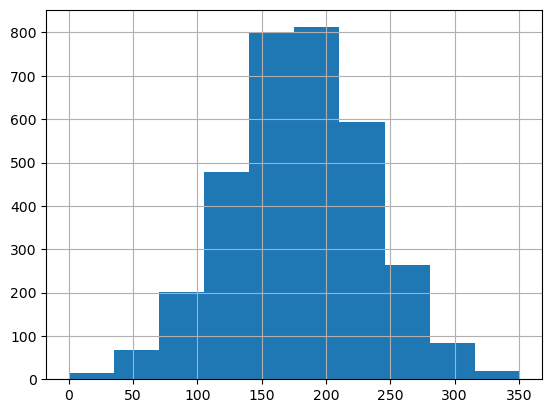

In [106]:
df["Total day minutes"].hist();

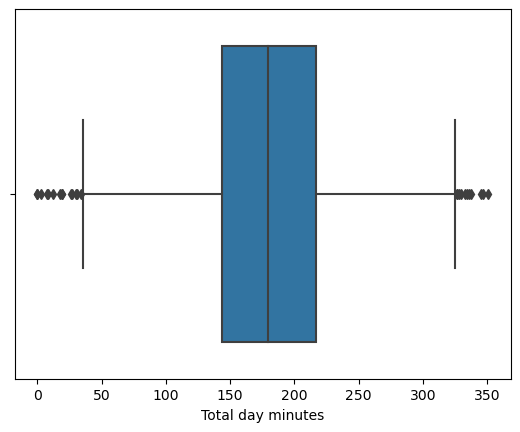

In [107]:
sns.boxplot(df["Total day minutes"]);

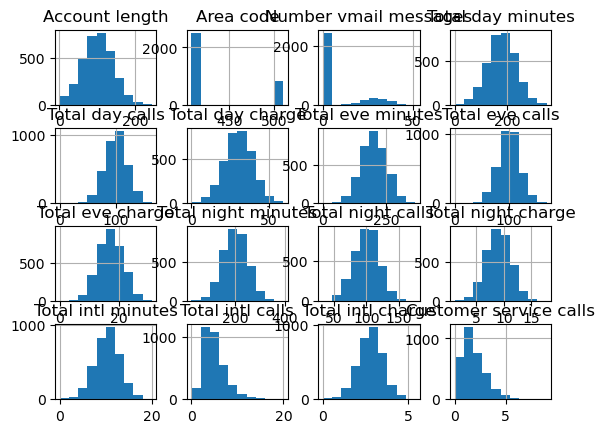

In [108]:
df.hist();

# 1.2. Категориальные
countplot

In [109]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [110]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

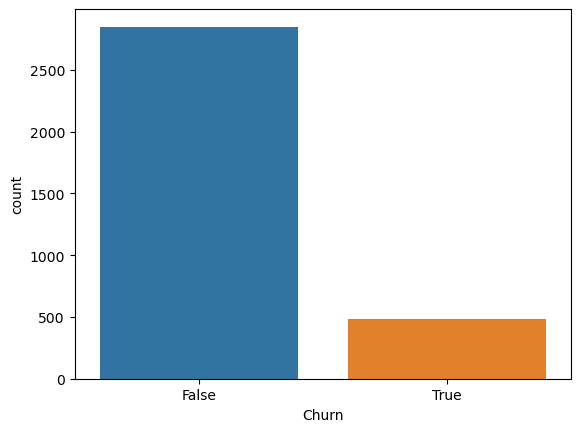

In [111]:
sns.countplot(df["Churn"]);

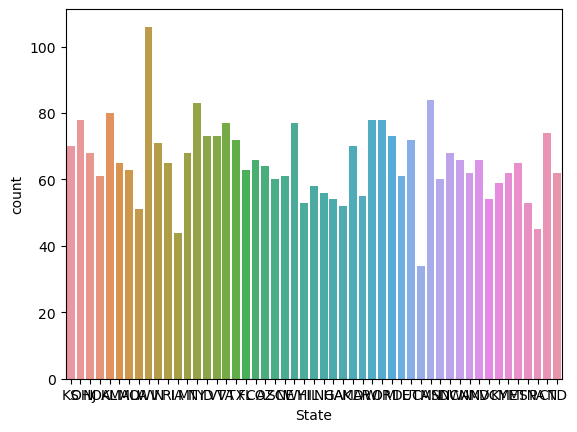

In [112]:
sns.countplot(df["State"]);

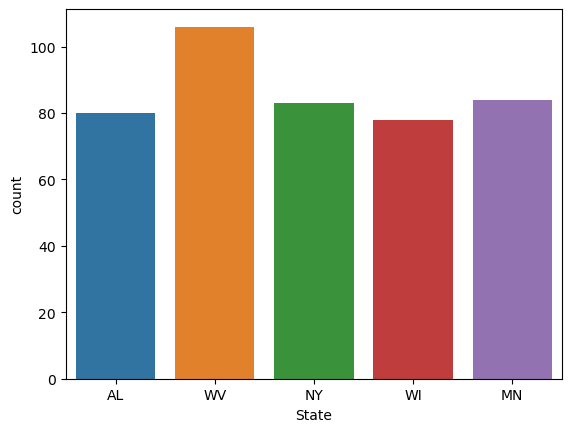

In [113]:
sns.countplot(df[df["State"].isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействия признаков
## 2.1. Количественный с количественным
pairplot, scatterplot, корреляции, heatmap

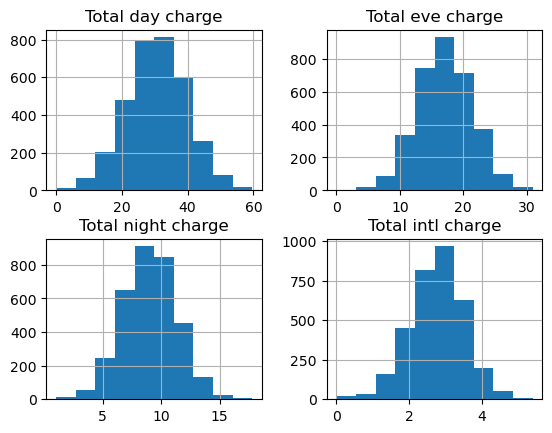

In [114]:
feat = [f for f in df.columns if "charge" in f]

df[feat].hist();

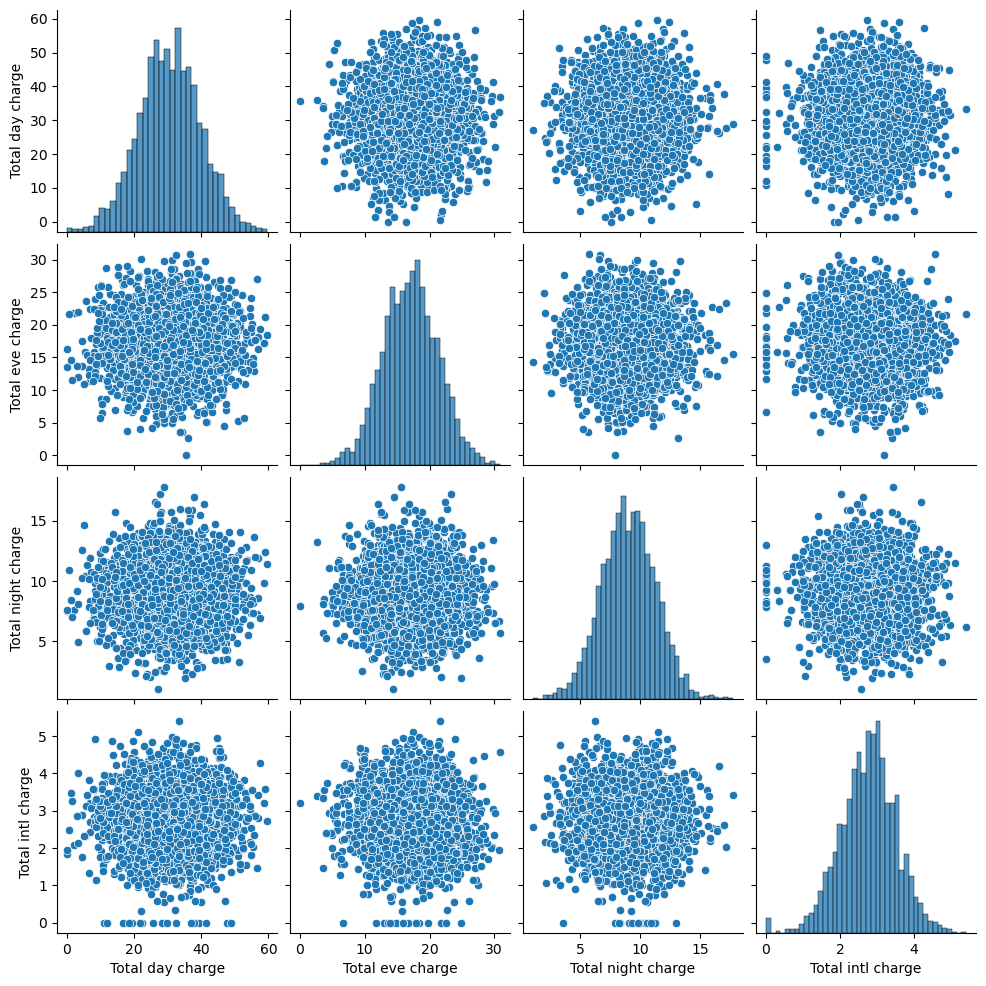

In [115]:
sns.pairplot(df[feat]);

In [125]:
df["Churn"].map({False: 'blue', True : 'Orange'})

0       blue
1       blue
2       blue
3       blue
4       blue
        ... 
3328    blue
3329    blue
3330    blue
3331    blue
3332    blue
Name: Churn, Length: 3333, dtype: object

In [132]:
# plt.scatter(df["Total eve charge"], df["Total intl charge"], color = df["Churn"].map({False: 'blue', True : 'Orange'}));
# plt.xlabel("Вечерние начисления");
# plt.ylabel("Междн начисления");

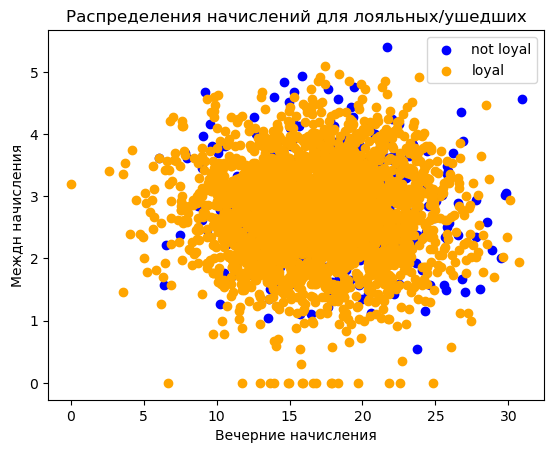

In [146]:
plt.scatter(df[df["Churn"]]["Total eve charge"],
            df[df["Churn"]]["Total intl charge"],
            color = 'blue', label = 'not loyal');
plt.scatter(df[~df["Churn"]]["Total eve charge"], 
            df[~df["Churn"]]["Total intl charge"], 
            color = 'orange', label = 'loyal');
plt.xlabel("Вечерние начисления");
plt.ylabel("Междн начисления");
plt.legend();
plt.title('Распределения начислений для лояльных/ушедших');

In [155]:
pays = [x for x in df.columns if "charge" in x]
pays

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [165]:
df.drop(pays, axis = 1, inplace=True)

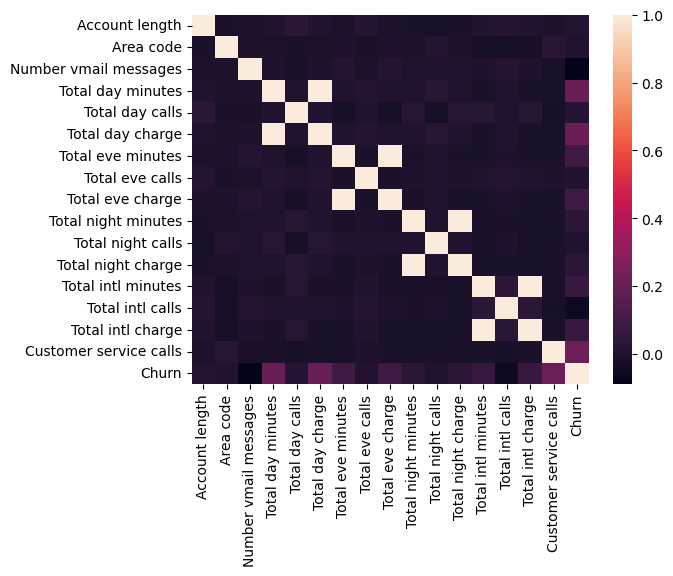

In [ ]:
sns.heatmap(df.corr());

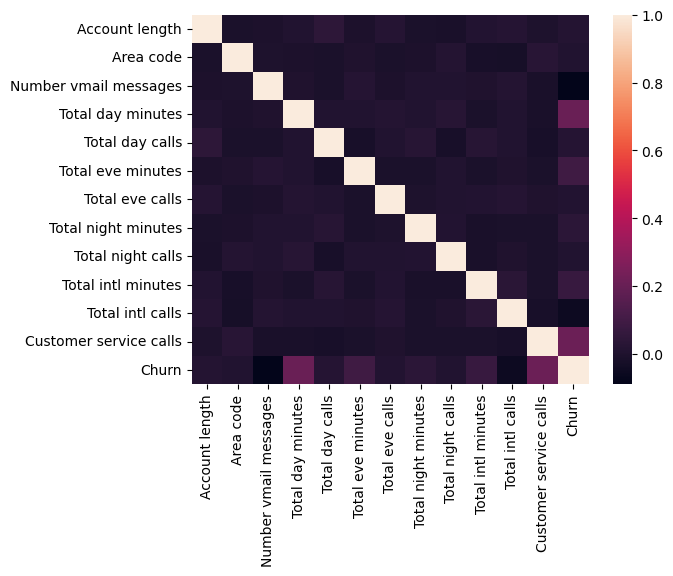

In [ ]:
sns.heatmap(df.corr());

## 2.2.  Количественный с категориальным
boxplot, violinplot

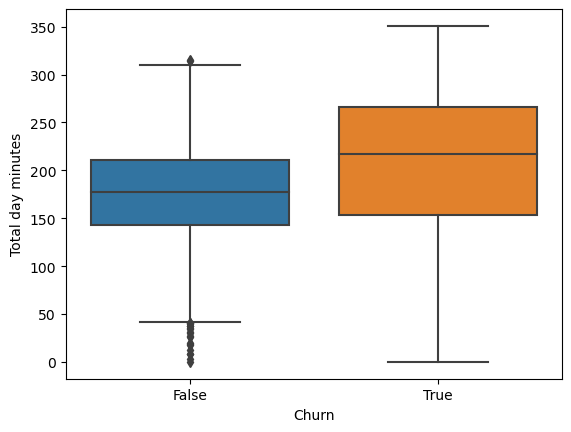

In [ ]:
sns.boxplot(x="Churn", y="Total day minutes", data=df);

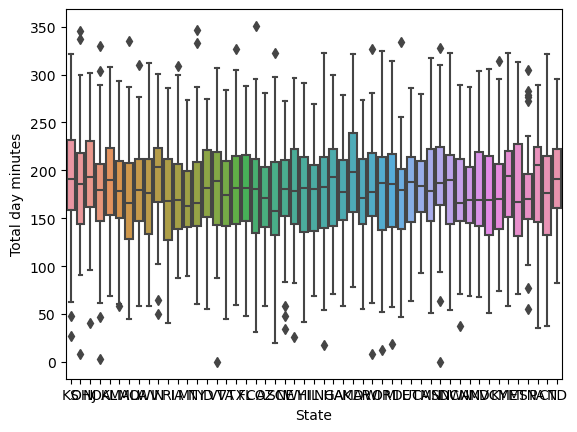

In [ ]:
sns.boxplot(x="State", y="Total day minutes", data=df);

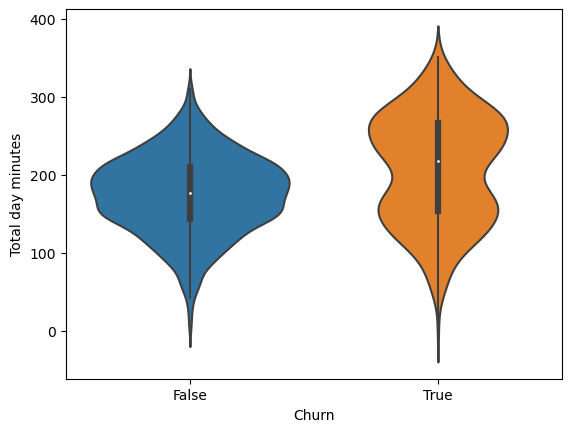

In [ ]:
sns.violinplot(x="Churn", y="Total day minutes", data=df);

In [ ]:
df.groupby("International plan")["Total day minutes"].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

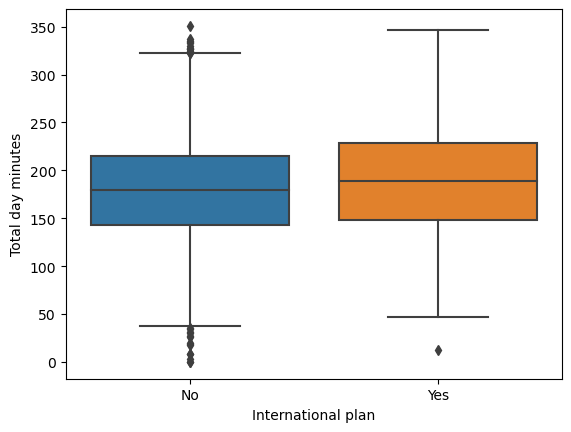

In [ ]:
sns.boxplot(x="International plan", y="Total day minutes", data=df);

## 2.3. Категориальный с категориальным
countplot

In [167]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


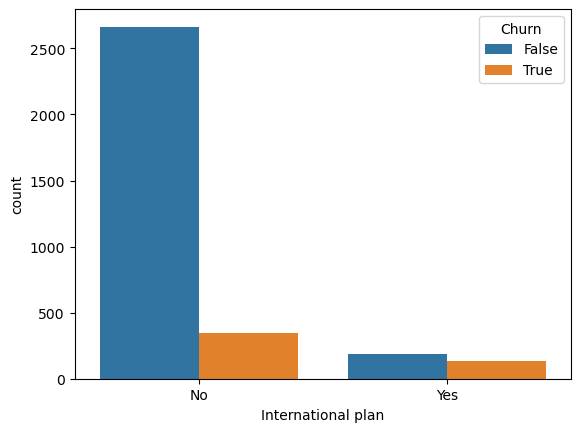

In [169]:
sns.countplot(x = 'International plan', hue = 'Churn', data = df);

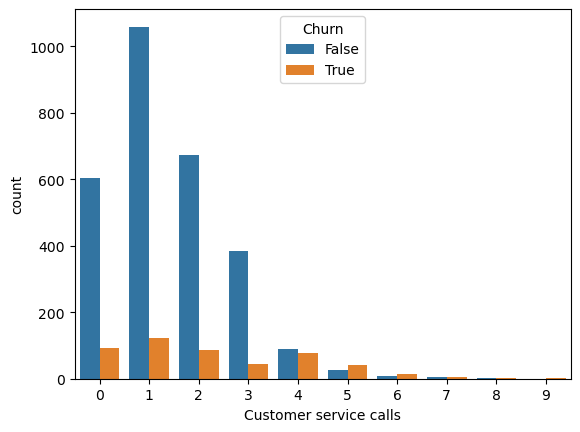

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

## 3. Прочее
Manifold learning, один из представителей – t-SNE

In [170]:
from sklearn.manifold import TSNE

In [171]:
tsne = TSNE(random_state=0)

In [172]:
df2 = df.drop(["State", "Churn"], axis=1)

In [173]:
df2["International plan"] = df2["International plan"].map({"Yes": 1, "No": 0})
df2["Voice mail plan"] = df2["Voice mail plan"].map({"Yes": 1, "No": 0})

In [175]:
%%time
tsne.fit(df2)

CPU times: total: 1min 45s
Wall time: 16.6 s


TSNE(random_state=0)

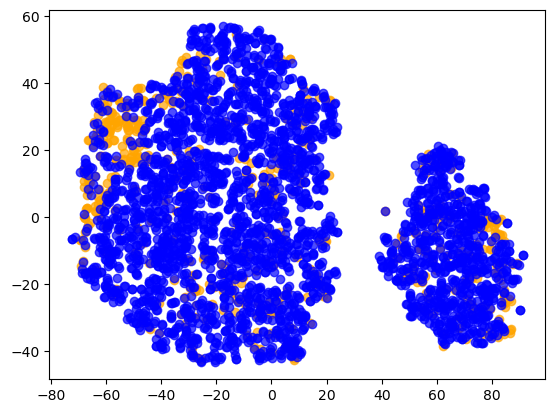

In [ ]:
plt.scatter(
    tsne.embedding_[df["Churn"].values, 0],
    tsne.embedding_[df["Churn"].values, 1],
    color="orange",
    alpha=0.7,
)
plt.scatter(
    tsne.embedding_[~df["Churn"].values, 0],
    tsne.embedding_[~df["Churn"].values, 1],
    color="blue",
    alpha=0.7,
);